In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bestsellers_with_categories.csv")

# Wyświetl pierwsze pięć wierszy (użyj funkcji head)

In [2]:
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


# Wyświetl wymiary zbioru danych (użyj atrybutu shape)

In [3]:
print(df.shape)

(550, 7)


# O ilu książkach przechowywane są dane w zbiorze danych?

In [4]:
print(f"Zbiór danych przechowuje informacje o {df.shape[0]} ksiazkach.")

Zbiór danych przechowuje informacje o 550 ksiazkach.


# Dla każdej z książek dostępnych jest 7 zmiennych (kolumn).

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

# Pierwotne badanie danych

* Sprawdź, czy wszystkie wiersze zawierają wystarczającą ilość danych: wypisz liczbę pustych miejsc (na) w każdej kolumnie (użyj funkcji isna i sum).

In [6]:
df_count_na = df.isna().sum()
print(df_count_na)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


 Czy są jakieś zmienne z brakującymi wartościami? (Nie)

* Sprawdź unikalne wartości w kolumnie genre (użyj funkcji unique).

In [7]:
df_genre_unique = df["genre"].unique()
print(df_genre_unique)

['Non Fiction' 'Fiction']


 Jakie są unikalne gatunki?
 'Non Fiction' i 'Fiction'

* Teraz spójrz na rozkład cen: zbuduj wykres (użyj kind='hist')

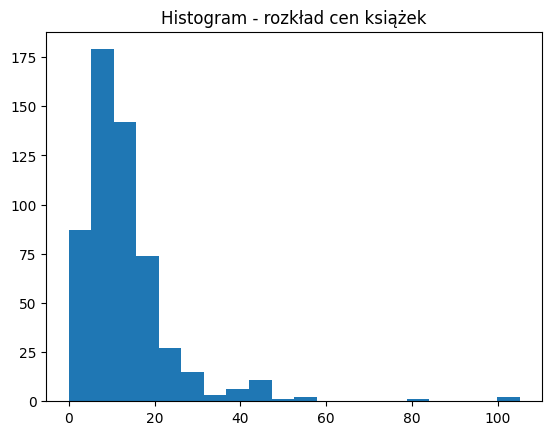

In [8]:
plt.hist(df["price"], bins=20)
plt.title("Histogram - rozkład cen książek")
plt.show()

* Określ maksymalną, minimalną, średnią i medianową cenę (użyj funkcji max, min, mean, median).

In [10]:
print("Cena maksymalna to: ", df["price"].max())
print("Cena minimalna to: ", df["price"].min())
print("Średnia to: ", df["price"].mean())
print("Mediana to: ", df["price"].median())

Cena maksymalna to:  105
Cena minimalna to:  0
Średnia to:  13.1
Mediana to:  11.0


# Wyszukiwanie i sortowanie danych

# Agregacja danych i łączenie tabel